Hypothesis function used for generating data is a quadratic function ax^2+bx+c.   a,b,c are chosen randomly within a range of (-5,5).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x1=np.full(31,1)
x0=np.full(31,1)
rmse=np.full(10,1)
for i in range(31):
    x1[i]=i
np.random.shuffle(x1)
x=np.matrix([x1,x0])
randcoeff=np.matrix(np.random.uniform(-5,5,3))
y=np.matrix(randcoeff[0,0]*np.square(x1)+randcoeff[0,1]*x1+randcoeff[0,2])

J is a variable used to separate the fraction of training data with total data. Varying from 0.1 to 1 it calculates root mean square error for each fraction to identify the optimum separation between training and test data.

In [ ]:
j=0.1
while j<1.0:
    ytrain=y[0,0:int(len(x.transpose())*j)]
    xtrain=x[:,0:int(len(x.transpose())*j)]
    ytest=y[0,int(len(x.transpose())*j)+1:len(x.transpose())]
    xtest=x[:,0:int(len(x.transpose())*j)+1:len(x.transpose())]

Noise introduction is toggled by a parameter noise. It adds gaussian noise to the data depending on its standard deviation. Noise is added in the range (-σ,σ) randomly to each data point.

In [ ]:
noise=1
if noise==1:
        stddeviation=y.std(1)
        y=y+np.random.randint(-np.float(stddeviation),np.float(stddeviation),31)

Finally gradient descent algorithm has been applied to the data to obtain the weights. Step size used is 0.0001. Convergence criteria required the difference in weights in successive iterations to be less than 0.0001.

In [ ]:
weights=np.matrix([-1.0,-1.0])
    weightsprev=weights*2
    while np.linalg.norm(weights-weightsprev)>0.0001:
        error=ytrain.transpose()-np.dot(xtrain.transpose(),weights.transpose())
        cost=np.dot(error.transpose(),xtrain.transpose())
        weightsprev=weights
        weights=weights+cost*0.0001
    if j==0.7:
        print(weights)

Finally the required data is plotted and results are output.

In [ ]:
    rmse[int(10*j-1)]=np.array(np.linalg.norm(ytrain.transpose()-np.dot(xtrain.transpose(),weights.transpose())))
    j=j+0.1
plt.scatter(np.array(x[0,:]),np.array(y[0,:]))
plt.plot([0,30],[weights[0,1],weights[0,0]*30+weights[0,1]])
plt.show()
plt.plot(rmse)
plt.show

Entire code for 1a is as follows.

[[  93.64169744 -398.24629236]]


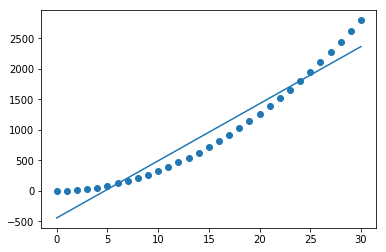

<function matplotlib.pyplot.show>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x1=np.full(31,1)
x0=np.full(31,1)
rmse=np.full(10,1)
for i in range(31):
    x1[i]=i
np.random.shuffle(x1)
x=np.matrix([x1,x0])
randcoeff=np.matrix(np.random.uniform(-5,5,3))
y=np.matrix(randcoeff[0,0]*np.square(x1)+randcoeff[0,1]*x1+randcoeff[0,2])
j=0.1
while j<1.0:
    ytrain=y[0,0:int(len(x.transpose())*j)]
    xtrain=x[:,0:int(len(x.transpose())*j)]
    ytest=y[0,int(len(x.transpose())*j)+1:len(x.transpose())]
    xtest=x[:,0:int(len(x.transpose())*j)+1:len(x.transpose())]
    noise=1
    if noise==0:
        stddeviation=y.std(1)
        y=y+np.random.randint(-np.float(stddeviation),np.float(stddeviation),31)
    weights=np.matrix([-1.0,-1.0])
    weightsprev=weights*2
    while np.linalg.norm(weights-weightsprev)>0.0001:
        error=ytrain.transpose()-np.dot(xtrain.transpose(),weights.transpose())
        cost=np.dot(error.transpose(),xtrain.transpose())
        weightsprev=weights
        weights=weights+cost*0.0001
    if j==0.7:
        print(weights)
    rmse[int(10*j-1)]=np.array(np.linalg.norm(ytrain.transpose()-np.dot(xtrain.transpose(),weights.transpose())))
    j=j+0.1
plt.scatter(np.array(x[0,:]),np.array(y[0,:]))
plt.plot([0,30],[weights[0,1],weights[0,0]*30+weights[0,1]])
plt.show()
plt.plot(rmse)
plt.show

Enter file addressC:\\Users\\srini\\OneDrive\\Academics\\ML courses\\ID 5030\Assignments\\Assignment 1\\assignment1.csv
[ 0.99793587  0.9212726   0.96006855 -0.12039315  0.9947399   0.97390739
  0.99951544]


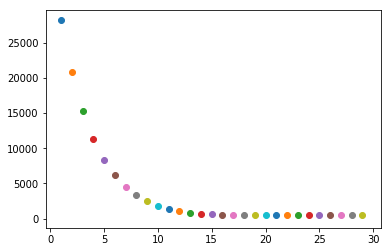

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#rmse=np.full(10,1.0)
rmse=1.0
#for i in range(31):
#    x1[i]=i
path=input("Enter file address")
data = pd.read_csv(path)
"""print(data)"""
data=data.dropna()
size=len(data.index)
duplicate=np.full(size,1)
x=data.iloc[:,2:9].values
y=data.iloc[:,1].values
np.random.shuffle(x)
iteration=0
j=0.7
#while j<1.0:
ytrain=y[0:int(len(x)*j)]
xtrain=x[0:int(len(x)*j)]
ytest=y[int(len(x)*j)+1:len(x)]
xtest=x[int(len(x)*j)+1:len(x)]
noise=1
if noise==0:
    stddeviation=y.std(1)
    y=y+np.random.randint(-np.float(stddeviation),np.float(stddeviation),31)
#print(y)
weights=np.full(x.shape[1],1.0)
weightsprev=weights*2
while np.linalg.norm(weights-weightsprev)>0.0001:
    error=ytrain-np.dot(xtrain,weights.transpose())
    cost=np.dot(xtrain.transpose(),error)
    weightsprev=weights
    """increment=np.dot(learnRate,cost.transpose())"""
    weights=weights+cost*0.0000000001
    rmse=np.linalg.norm(ytest-np.dot(xtest,weights.transpose()))
    iteration=iteration+1
    plt.scatter(iteration,rmse)
#if j==0.7:
print(weights)
plt.show()
    #j=j+0.1
#plt.scatter(np.array(x[:]),np.array(y[:]))
#plt.plot([0,30],[weights[0,1],weights[0,0]*30+weights[0,1]])
#plt.show()
#plt.plot(rmse)
#plt.show